<a href="https://www.kaggle.com/code/andrewbaum/mass-shooting-data-exploration?scriptVersionId=111175881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import plotly as py
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



/kaggle/input/history-of-mass-shootings-in-the-usa/History_of_Mass_Shootings_in_the_USA.csv


In [2]:
data = pd.read_csv("../input/history-of-mass-shootings-in-the-usa/History_of_Mass_Shootings_in_the_USA.csv")
data.head()

,Date,City,State,Dead,Injured,Total,Description
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...


The data was updated as recently as this month to include values from July 2022. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2712 non-null   object
 1   City         2712 non-null   object
 2   State        2712 non-null   object
 3   Dead         2712 non-null   int64 
 4   Injured      2712 non-null   int64 
 5   Total        2712 non-null   int64 
 6   Description  2712 non-null   object
dtypes: int64(3), object(4)
memory usage: 148.4+ KB


In [4]:
data.isna().mean()

Date           0.0
City           0.0
State          0.0
Dead           0.0
Injured        0.0
Total          0.0
Description    0.0
dtype: float64

There are no null values in the dataset.

In [5]:
data.shape

(2712, 7)

In [6]:
data.columns

Index(['Date', 'City', 'State', 'Dead', 'Injured', 'Total', 'Description'], dtype='object')

In [7]:
data.pop('Description')

0       Four teenagers, one of whom died, were shot at...
1       Four people, including a teenager, were shot i...
2       Four people were shot after a fight in the Bro...
3       One person was killed, and seven others were i...
4       Seven people were shot when someone opened fir...
                              ...                        
2707    Kansas City Massacre: Four law enforcement off...
2708    Murder of the Lawson family: Charles Lawson sh...
2709    Saint Valentine's Day Massacre: Seven members ...
2710    Columbine Mine Massacre: A fight broke out bet...
2711    Hanapepe Massacre: During a strike of Filipino...
Name: Description, Length: 2712, dtype: object

In [8]:
data.dtypes

Date       object
City       object
State      object
Dead        int64
Injured     int64
Total       int64
dtype: object

In [9]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.dtypes

Date       datetime64[ns]
City               object
State              object
Dead                int64
Injured             int64
Total               int64
dtype: object

In [10]:
data.head()

,Date,City,State,Dead,Injured,Total
0,2022-07-31,Decatur,Illinois,1,3,4
1,2022-07-31,Hartford,Connecticut,0,4,4
2,2022-07-31,Indianapolis,Indiana,0,4,4
3,2022-07-31,Detroit,Michigan,1,7,8
4,2022-07-31,Orlando,Florida,0,7,7


In [11]:
data.sample(10)

,Date,City,State,Dead,Injured,Total
2399,2018-05-27,Aurora,Colorado,1,3,4
2230,2018-11-14,Baton Rouge,Louisiana,3,1,4
2474,2018-02-26,Detroit,Michigan,5,0,5
1868,2019-09-14,St. Louis,Missouri,2,2,4
2288,2018-07-09,Prices Corner,Delaware,5,0,5
95,2022-02-07,Haltom City,Texas,3,4,7
2535,2017-03-22,Schofield and Rothschild,Wisconsin,5,0,5
74,2022-05-07,Steubenville,Ohio,0,4,4
961,2021-04-15,Chicago,Illinois,0,4,4
2124,2019-01-03,Texas City,Texas,3,1,4


In [12]:
#checking to see that values before 2018 exist in the data (there was an error in previous version of the dataset)
old = data.sort_values(by='Date',ascending=True).head(10)
old

,Date,City,State,Dead,Injured,Total
2711,1924-09-09,Hanapepe,Hawaii,20,0,20
2710,1927-11-21,Serene,Colorado,6,0,6
2709,1929-02-14,Chicago,Illinois,7,0,7
2708,1929-12-25,Germanton,North Carolina,7,0,7
2707,1933-06-17,Kansas City,Missouri,5,3,8
2706,1935-10-24,Rio Piedras,Puerto Rico,5,2,7
2705,1945-07-08,Salina,Utah,9,19,28
2704,1946-07-25,Walton County,Georgia,4,0,4
2703,1949-09-06,Camden,New Jersey,13,3,16
2702,1958-01-18,Maxton,North Carolina,0,4,4


In [13]:
data.describe()

,Dead,Injured,Total
count,2712.000000,2712.000000,2712.000000
mean,1.436578,4.401180,5.837021
std,2.880447,8.532826,10.130793
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,2.000000,5.000000,6.000000
max,61.000000,411.000000,472.000000


<AxesSubplot:title={'center':'Mass shooting events in the United States between 1924-2022'}>

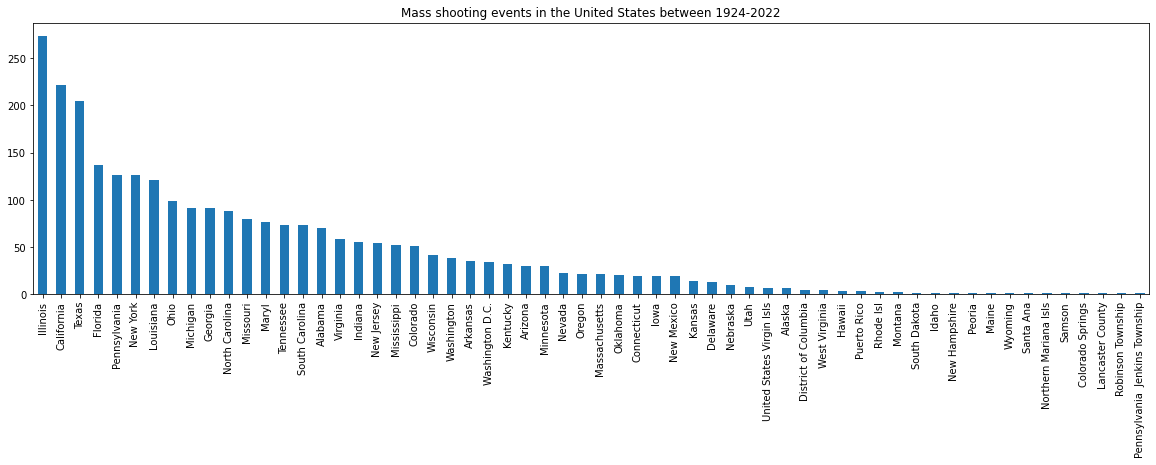

In [14]:
data.State.value_counts().plot(kind = 'bar',figsize=(20,5), title = "Mass shooting events in the United States between 1924-2022")

Overall, Illinois has had the most mass shooting events since 1924. 

In [15]:
dead = data.sort_values(by=['Dead'])

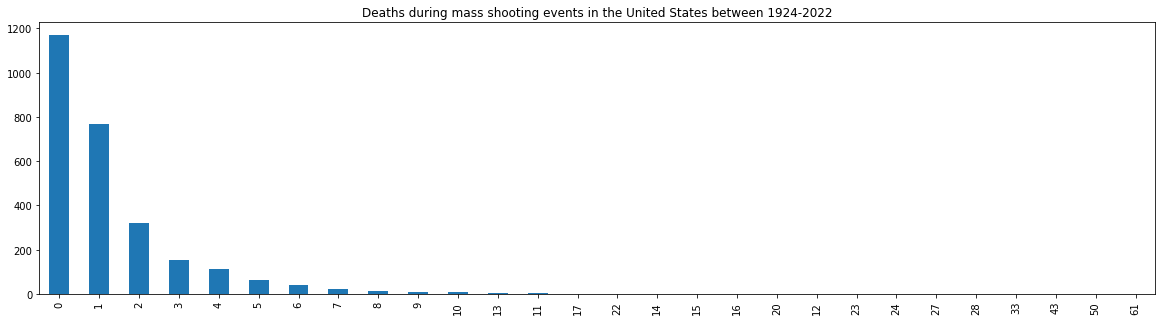

In [16]:
fig = dead.Dead.value_counts().plot(kind = 'bar',figsize=(20,5), title = "Deaths during mass shooting events in the United States between 1924-2022")

In [17]:
injured = data.sort_values(by=['Injured'])
injured

,Date,City,State,Dead,Injured,Total
2711,1924-09-09,Hanapepe,Hawaii,20,0,20
171,2022-02-06,Centerville,Texas,5,0,5
172,2022-01-06,Tulsa,Oklahoma,5,0,5
173,2022-05-31,Wyoming,Michigan,4,0,4
2710,1927-11-21,Serene,Colorado,6,0,6
...,...,...,...,...,...,...
2593,2009-11-05,Fort Hood,Texas,14,33,47
84,2022-04-07,Highland Park,Illinois,7,48,55
2538,2016-06-12,Orlando,Florida,50,58,108
2580,2012-07-20,Aurora,Colorado,12,70,82


<AxesSubplot:title={'center':'Injuries during mass shooting events in the United States between 1924-2022'}>

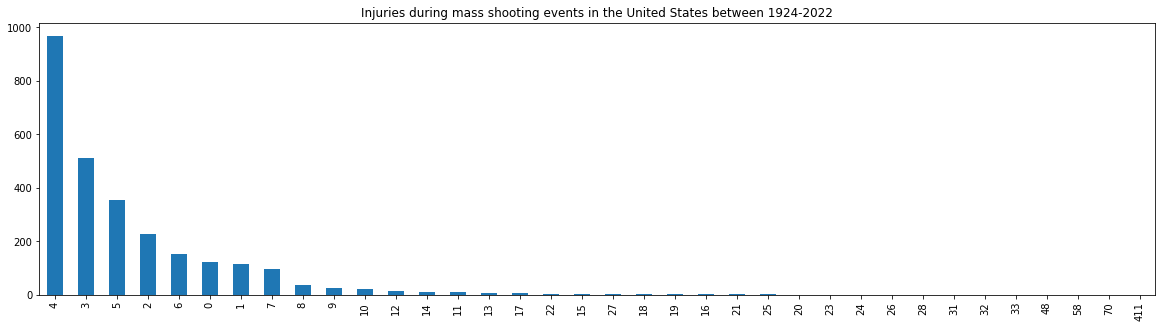

In [18]:
injured.Injured.value_counts().plot(kind = 'bar',figsize=(20,5), title = "Injuries during mass shooting events in the United States between 1924-2022")

Based on these graphs, in most mass shootings 0 people die and 4 people are injured. 

In [19]:
top = data.sort_values(by='Total',ascending=False).head(10)
top

,Date,City,State,Dead,Injured,Total
2536,2017-10-01,Paradise,Nevada,61,411,472
2538,2016-06-12,Orlando,Florida,50,58,108
2580,2012-07-20,Aurora,Colorado,12,70,82
84,2022-04-07,Highland Park,Illinois,7,48,55
2653,1991-10-16,Killeen,Texas,24,27,51
2607,2007-04-16,Blacksburg,Virginia,33,17,50
2532,2017-11-05,Sutherland Springs,Texas,27,22,49
2698,1966-08-01,Austin,Texas,17,31,48
2593,2009-11-05,Fort Hood,Texas,14,33,47
2116,2019-08-03,El Paso,Texas,23,23,46


<AxesSubplot:title={'center':'Total Injuries and Deaths in Top 10 Mass Shootings'}, xlabel='City'>

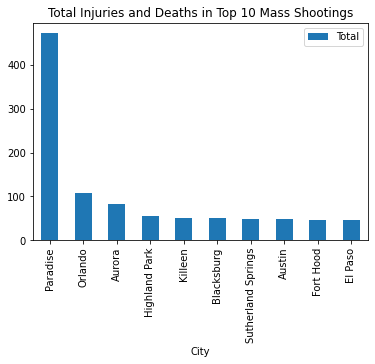

In [20]:
top.plot(kind='bar',x='City',y='Total', title= "Total Injuries and Deaths in Top 10 Mass Shootings")

#top.Total.value_counts().plot(kind = 'bar',figsize=(20,5), title = "Deaths during mass shooting events in the United States between 1924-2022")

The deadliest mass shooting happened in Paradise, Nevada (Las Vegas) and has significantly more total deaths and injuries than the other events, and differences can be attributed to how the mass shooting was preformed. The shooter had numerous weapons, which were converted to automatic weapons via bump stock, from a hotel room facing a crowded area. The total deaths + injuries is actually misquoted in the dataset, and the number of injuries is likely referring to only the people injured by gunshot. There were over 860 people injured in total.

The next biggest mass shooting occured in Orlando, Florida at a gay bar and was declared a terrorist act. The large amount of deaths and injuries was also a result of semi automatic weapons. 

The shootings in Aurora, Highland Park and Killeen also involved a semi automatic weapons. 

Texas has the most deadliest mass shootings in the dataset, with five out of the top 10 deadliest shoootings having occured in Texas. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:title={'center':'Deaths and injuries from mass shooting between 1924-2022'}, xlabel='State'>

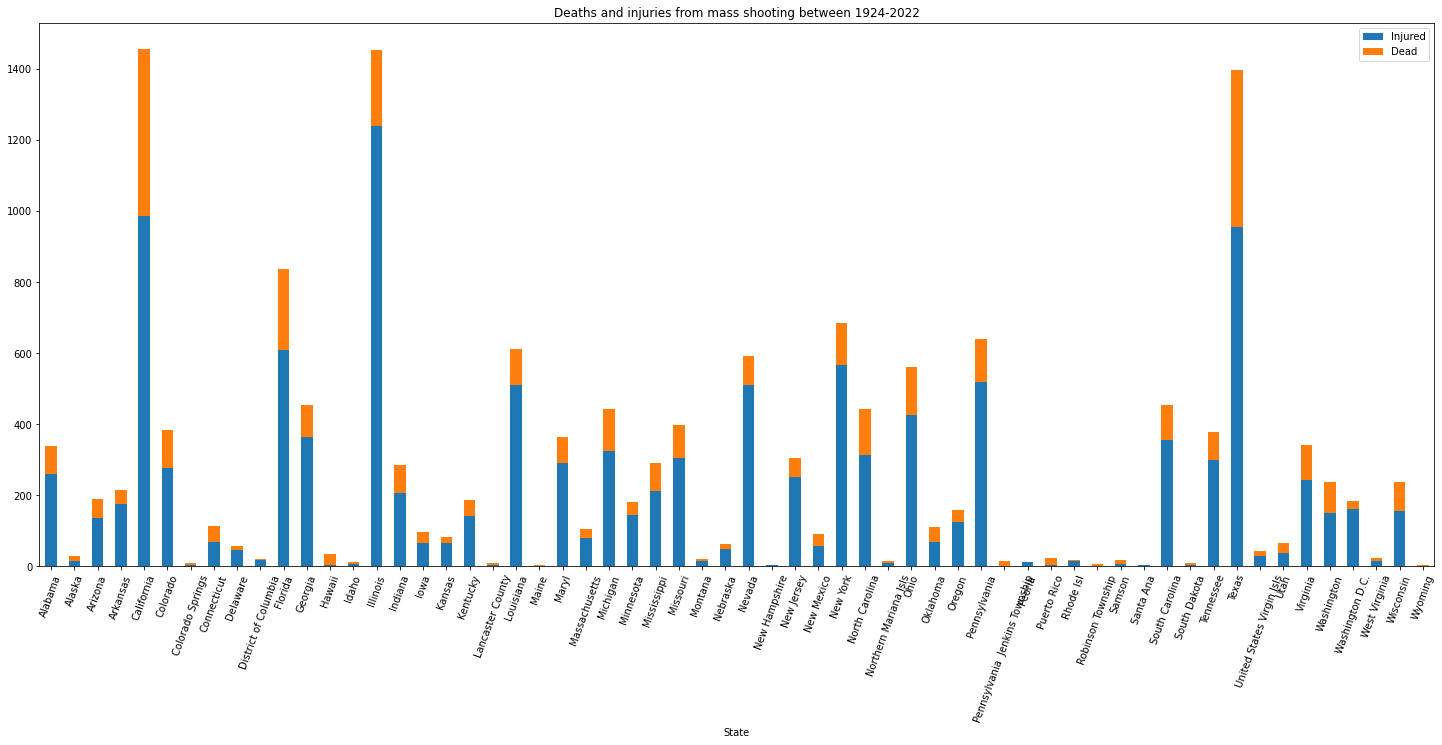

In [21]:
injured_dead = data.groupby(['State'])['Injured','Dead'].sum()
injured_dead.plot(kind='bar', stacked=True, figsize = (25,10), rot = 70, title = "Deaths and injuries from mass shooting between 1924-2022")

While Texas may have had the most top deadliest shootings, the overall total deaths and injuries between Texas and California are similar; Illinois also has a similar total, however with fewer deaths and more injuries. 

States likes Maine, New Hampshire, Rhode Island, South Dakota, West Virginia and Wyoming have the least deaths and injuries. 

In [22]:
data['year'] = pd.DatetimeIndex(data['Date']).year

<AxesSubplot:>

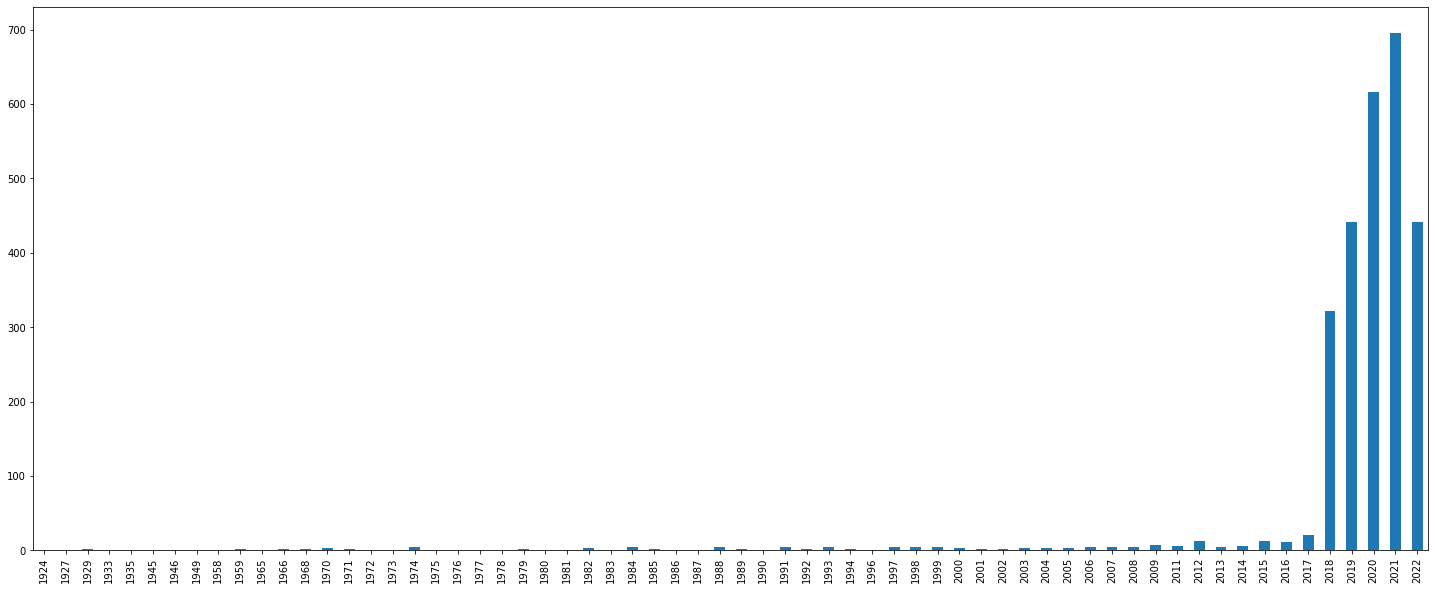

In [23]:
data.year.value_counts(sort=False)[::-1].plot(kind = 'bar',figsize=(25,10))

Mass shooting deaths and injuries have a distinct rise beginning in 2018 and have been on the rise since. There is likely not one individual cause leading to the spike, but instead a multitude of factors possibly including lax gun laws which remain unchanged despite a marked increases in mass shootings and a general increase in social unrest since 2016. 

# United States Mass Shooting Maps

In [24]:
state_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
data['state_code'] = data.State.replace(state_code)

In [25]:
data.head(10)

,Date,City,State,Dead,Injured,Total,year,state_code
0,2022-07-31,Decatur,Illinois,1,3,4,2022,IL
1,2022-07-31,Hartford,Connecticut,0,4,4,2022,CT
2,2022-07-31,Indianapolis,Indiana,0,4,4,2022,IN
3,2022-07-31,Detroit,Michigan,1,7,8,2022,MI
4,2022-07-31,Orlando,Florida,0,7,7,2022,FL
5,2022-07-31,South Bend,Indiana,0,4,4,2022,IN
6,2022-07-30,Wheeling,Illinois,0,5,5,2022,IL
7,2022-07-30,Girard,Georgia,1,4,5,2022,GA
8,2022-07-30,Monroe,Louisiana,1,3,4,2022,LA
9,2022-07-29,Cleveland,Ohio,1,3,4,2022,OH


In [26]:
#group by state_code to get total dead, injured and complete totals for each state for mapping
state_data = data.groupby(by=["state_code"]).sum()
state_data.head()

,Dead,Injured,Total,year
state_code,,,,
AK,16,14,30,14082
AL,78,261,339,141403
AR,39,175,214,70675
AZ,54,135,188,60545
CA,472,985,1457,447774


In [27]:
#reset index so it's not state_code and can be mapped
states_index = state_data.reset_index(level=0)
states_index.head()

,state_code,Dead,Injured,Total,year
0,AK,16,14,30,14082
1,AL,78,261,339,141403
2,AR,39,175,214,70675
3,AZ,54,135,188,60545
4,CA,472,985,1457,447774


In [28]:
fig = px.choropleth(states_index,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Dead',
                    range_color = [1,500],
                    )

fig.update_layout(
    title_text = 'Total Mass Shooting Deaths between 1924-2022',
)
fig.show()

In [29]:
fig = px.choropleth(states_index,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Injured',
                    range_color = [1,1300],
                    )

fig.update_layout(
    title_text = 'Total Mass Shooting Injuries between 1924-2022',
)
fig.show()

In [30]:
fig = px.choropleth(states_index,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total',
                    range_color = [1,1500],
                    )

fig.update_layout(
    title_text = 'Total Mass Shooting Deaths and Injuries between 1924-2022',
)
fig.show()


The mapped data reinforces that California and Texas are the deadliest states by absolute total, however it would be interesting to perform further analysis where the data is normalized by state populations. California and Texas have the highest populations in the country; there is a clear correlation between state population and mass shooting deaths without normalization. 

In the injuries map, the state of Illinois is surprising by having the highest amount of injuries (1239), despite being the 6th biggest state. Even more surprising is that only one of the top ten deadliest mass shootings in from Illinois, therefore Illinois has more, but smaller mass shootings overall and is the deadliest state in terms of mass shootings in the US as well as the most likely for a mass shooting to occur. 

If one is traveling to the US and would like to avoid the worst areas for mass shootings, the midwest and New England areas have the least deaths and injuries from mass shootings overall. However, the populations of these regions are also lower than the others, thus for an overall safety rating the data should be normalized by population.  

In [31]:
data.head(10)

,Date,City,State,Dead,Injured,Total,year,state_code
0,2022-07-31,Decatur,Illinois,1,3,4,2022,IL
1,2022-07-31,Hartford,Connecticut,0,4,4,2022,CT
2,2022-07-31,Indianapolis,Indiana,0,4,4,2022,IN
3,2022-07-31,Detroit,Michigan,1,7,8,2022,MI
4,2022-07-31,Orlando,Florida,0,7,7,2022,FL
5,2022-07-31,South Bend,Indiana,0,4,4,2022,IN
6,2022-07-30,Wheeling,Illinois,0,5,5,2022,IL
7,2022-07-30,Girard,Georgia,1,4,5,2022,GA
8,2022-07-30,Monroe,Louisiana,1,3,4,2022,LA
9,2022-07-29,Cleveland,Ohio,1,3,4,2022,OH


In [32]:
#url = "https://www.nrcs.usda.gov/wps/portal/nrcs/detail/la/technical/cp/?cid=nrcs143_013697"
##html_text = requests.get(url).text
#soup = BeautifulSoup(html_text, 'html.parser')
#loc_data = []
#for tr in soup.find('table', class_='data').find_all('tr'):
 #   row = [td.text for td in tr.find_all('td')]
    # If want to filter out all except LA then can do that here
   # if len(row) == 3 and row[2] == 'IL':
  #      loc_data.append(row)
#loc_df = pd.DataFrame(data, columns=['FIPS', 'Name', 'State'])
#print(df)